## Loading data and libraries

In [1]:
#Importing all nesessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn import preprocessing

In [2]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Handling missing values

In [3]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
stroke_data[stroke_data.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


We can see that our dataset contains missing values only in the column 'bmi' and the number of such records i 201. As these rows contain information in all other columns and can be used for train and/or evaluating our models, we can replace NaN values with the average value.

In [6]:
stroke_data.bmi = stroke_data.bmi.fillna(stroke_data.bmi.mean())
stroke_data. head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## Exploring data

In [7]:
stroke_data.groupby(stroke_data.stroke).id.count()

stroke
0    4861
1     249
Name: id, dtype: int64

In [8]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
stroke_data= stroke_data.drop(columns = 'id')

The number of records describing people with stroke is only about 5% of all data. Also, we can immediately notice that the table contains information about a person's id, I deleted it, as for me this column seems to be unnecessary.

In [10]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


From the description of the numeric values from our dataset, we can see that the number of people with 'heart_disease' or 'hypertension' is small. Such columns as 'avg_glucose_level' and  'bmi' have positively skewed distribution. Let's see it on histograms.

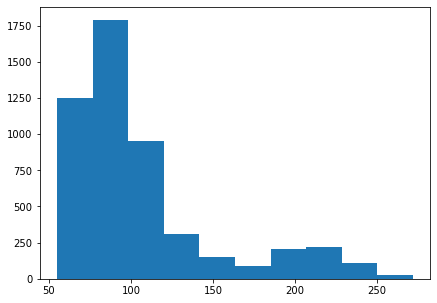

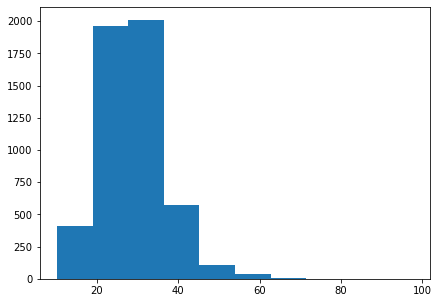

In [12]:
for col in [stroke_data.avg_glucose_level, stroke_data.bmi]:
    fig = plt.figure(figsize=(7, 5))
    plt.hist(col) 
plt.show()

In [13]:
categorical_features = ['gender','ever_married','work_type', 'Residence_type','smoking_status']

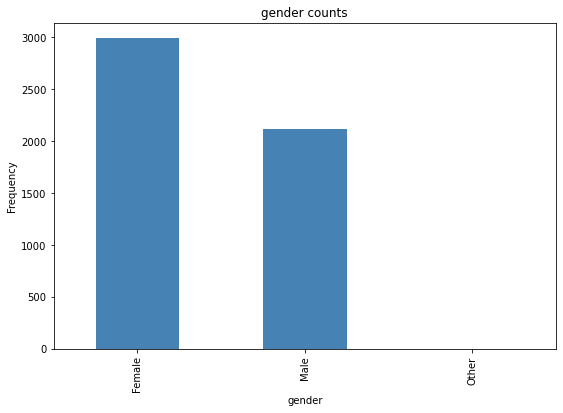

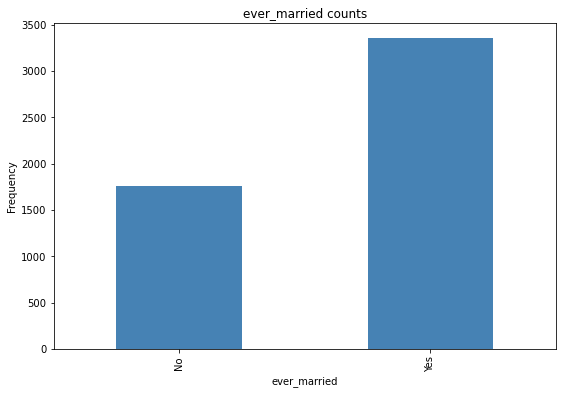

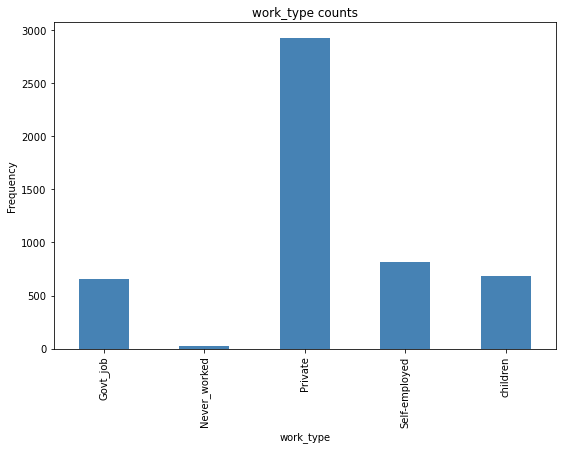

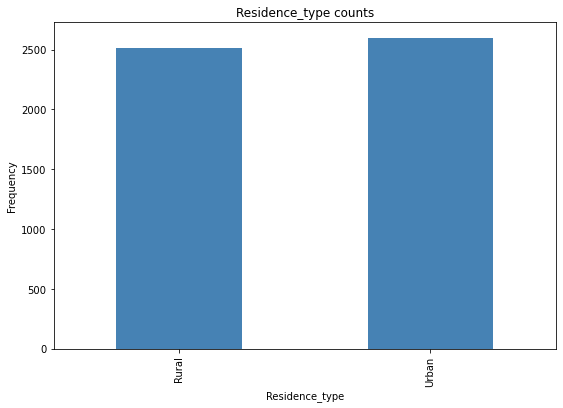

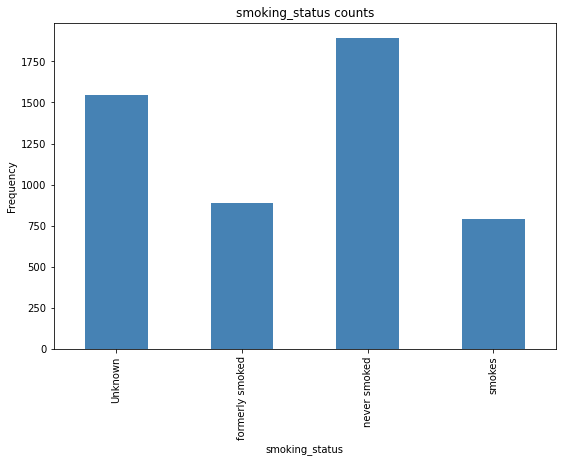

In [14]:
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# plot a bar plot for each categorical feature count
for col in categorical_features:
    counts = stroke_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [15]:
stroke_data.gender.value_counts()  

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [16]:
stroke_data[stroke_data.gender == 'Other']  

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [17]:
stroke_data= stroke_data.drop([3116])

From the visualization of categorical features, we can see that there is such gender as 'Other' in our dataset. I counted all possible values in this column and found out that there is only one row with the gender 'Other'. Also in this row, several other features have zero value, so I decided to delete this row from the dataset.

In [18]:
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='gender', ylabel='count'>

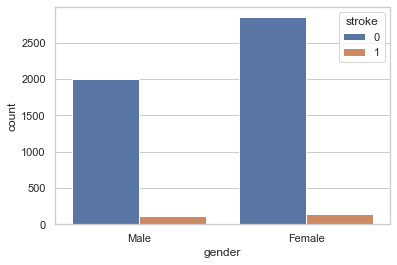

In [19]:
sns.countplot(x = 'gender', hue = 'stroke', data = stroke_data)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

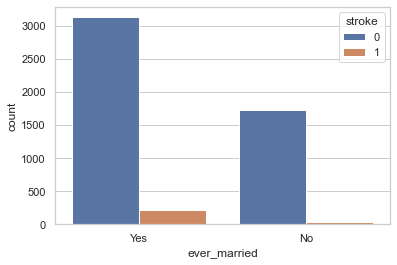

In [20]:
sns.countplot(x = 'ever_married', hue = 'stroke', data = stroke_data)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

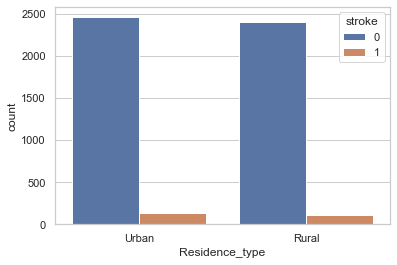

In [21]:
sns.countplot(x = 'Residence_type', hue = 'stroke', data = stroke_data)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

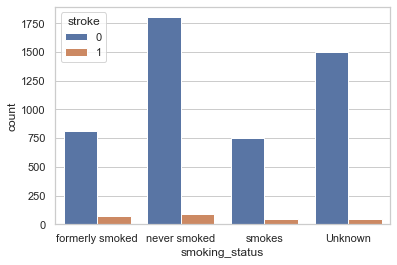

In [22]:
sns.countplot(x = 'smoking_status', hue = 'stroke', data = stroke_data)

In [23]:
sns.set(rc={'figure.figsize':(9,7)})


<AxesSubplot:xlabel='stroke', ylabel='age'>

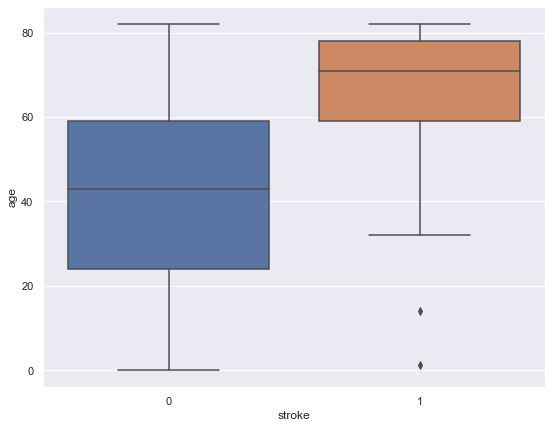

In [24]:
sns.boxplot(data=stroke_data, x="stroke", y="age")

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

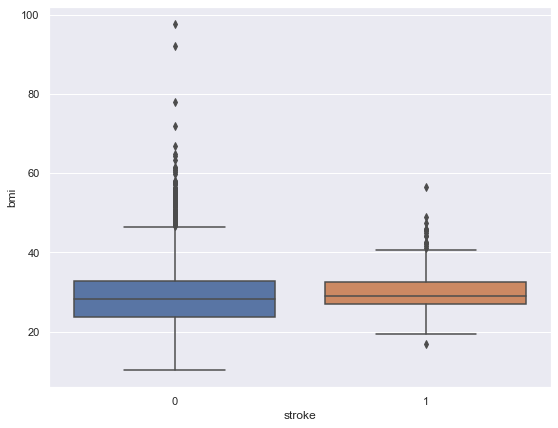

In [25]:
sns.boxplot(data=stroke_data, x="stroke", y="bmi")


<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

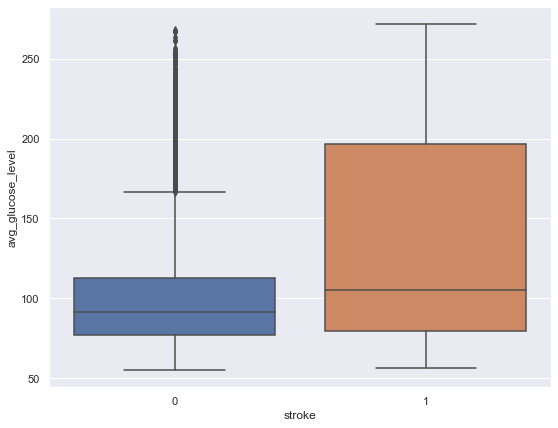

In [26]:
sns.boxplot(data=stroke_data, x="stroke", y="avg_glucose_level")


The visualization above shows us that most probably older people with higher average glucose levels who ever smoked are more susceptible to stroke.

# Preparing data

In [27]:
stroke_data['gender'] = stroke_data['gender'].map({'Female':0,'Male':1})
stroke_data['ever_married'] = stroke_data['ever_married'].map({'No':0,'Yes':1})
stroke_data['Residence_type'] = stroke_data['Residence_type'].map({'Rural':0,'Urban':1})


In [28]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


In [29]:
def encode (column_name, df):
    ohe = OneHotEncoder()
    transformed = ohe.fit_transform(df[[column_name]])
    df[ohe.categories_[0]] = transformed.toarray()



In [30]:
encode('work_type', stroke_data)

In [31]:
encode('smoking_status', stroke_data)

In [32]:
stroke_data = stroke_data.drop(['work_type', 'smoking_status'], axis = 1)

I encoded all categorical features in order to use them in training and evaluation models. In 'gender', 'ever_married', 'Residence_type' features I replaced categories with 0 or 1. For the rest I used OneHotEncoder.

<AxesSubplot:>

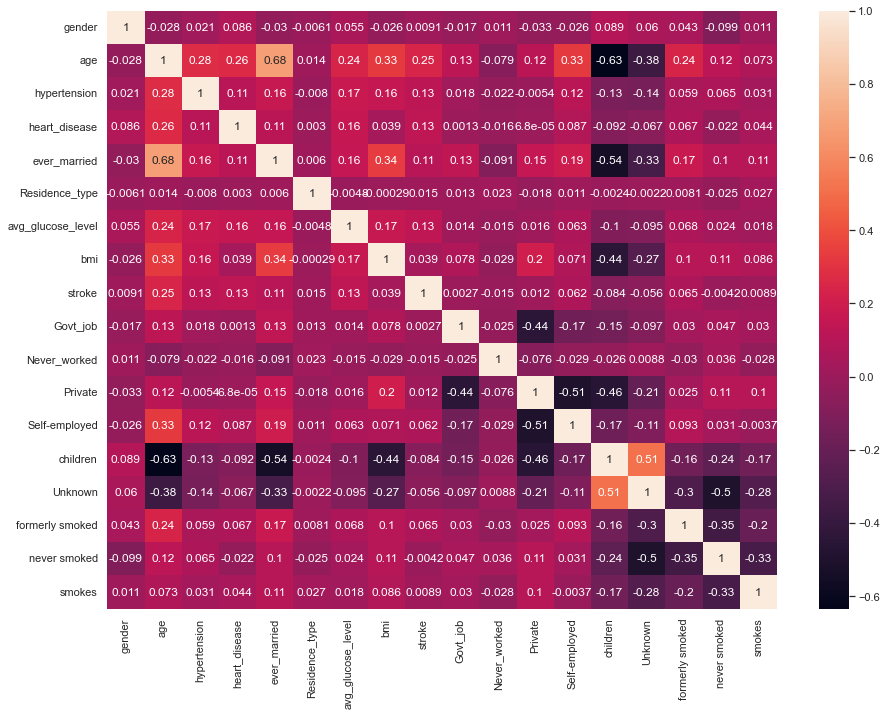

In [33]:
sns.set (rc = {'figure.figsize':(15, 11)})
sns.heatmap(stroke_data.corr(), annot=True)

**Split data**

In [34]:
X = stroke_data.drop(['stroke'], axis = 1)
Y = stroke_data.stroke

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [36]:
y_train

3726    0
2657    0
4808    0
2036    0
768     0
       ..
4932    0
3265    0
1653    0
2607    0
2732    0
Name: stroke, Length: 3576, dtype: int64

In [37]:
X_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
42,1,82.0,0,1,1,1,144.90,26.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
380,1,4.0,0,0,0,0,106.22,16.7,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1559,0,53.0,0,0,1,0,72.63,66.8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
352,0,20.0,0,0,0,0,96.57,34.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3639,0,51.0,1,0,1,0,85.84,31.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,0,61.0,0,0,1,0,99.35,26.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
663,0,38.0,0,0,1,0,98.73,24.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3933,0,32.0,0,0,1,1,101.13,43.9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4413,1,21.0,0,0,0,1,73.81,19.8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Model training and evaluation

**LogisticRegression**

In [38]:
from sklearn.linear_model import LogisticRegression

reg = 0.01

model_LR = LogisticRegression(C=1/reg, solver="liblinear")
model_LR.fit(X_train, y_train)
print (model_LR)

predictions_LR = model_LR.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions_LR))

LogisticRegression(C=100.0, solver='liblinear')
Accuracy:  0.9510763209393346


In [39]:
y_pred_prob_LR = model_LR.predict_proba(X_test)[:, 1]
tree_clf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_LR)
tree_clf_roc_auc_score

0.8127460896579128

In [40]:
confusion_matrix(predictions_LR, y_test)

array([[1457,   75],
       [   0,    1]])

**RandomForestClassifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(max_depth = 10, criterion= 'entropy',  random_state = 0)

model_RFC.fit(X_train, y_train)

print (model_RFC)

predictions_model_RFC = model_RFC.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions_forest_clf))

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=0)
Accuracy:  0.9504240052185258


In [50]:
cross_val_score (model_RFC, X_train, y_train, cv = 5)

array([0.95111732, 0.95244755, 0.95244755, 0.94965035, 0.94825175])

In [51]:
y_pred_prob_model_RFC = model_RFC.predict_proba(X_test)[:, 1]
tree_clf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_model_RFC)
tree_clf_roc_auc_score

0.8005183686739155

In [52]:
confusion_matrix(predictions_forest_clf, y_test)

array([[1457,   76],
       [   0,    0]])

**DecisionTreeClassifier and BaggingClassifier**

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier( 
    DecisionTreeClassifier(random_state=0, max_depth=1), n_estimators=25, 
    max_samples=0.01, bootstrap=True, oob_score = True, n_jobs=-1, random_state=0) 

bag_clf.fit(X_train, y_train)

print (bag_clf)

predictions_bag_clf = bag_clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions_bag_clf))

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        random_state=0),
                  max_samples=0.01, n_estimators=25, n_jobs=-1, oob_score=True,
                  random_state=0)
Accuracy:  0.9504240052185258


In [54]:
cross_val_score (bag_clf, X_train, y_train, cv = 5)

array([0.95111732, 0.95244755, 0.95244755, 0.95104895, 0.95104895])

In [55]:
y_pred_prob_bag_clf = bag_clf.predict_proba(X_test)[:, 1]
bag_clf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_bag_clf)
bag_clf_roc_auc_score

0.7610943539356283

In [56]:
confusion_matrix (y_test, predictions_bag_clf)

array([[1457,    0],
       [  76,    0]])

In [57]:
precision = precision_score(y_test, predictions_bag_clf, average='macro')
recall = recall_score(y_test, predictions_bag_clf, average='macro')
print(precision,recall)

0.4752120026092629 0.5


/Users/irinareznicenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**XGBoost**

In [58]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.fit_transform(X_test)


In [59]:
X_train_normalized

array([[1.        , 0.02099609, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.43847656, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.4140625 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.53613281, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.25537109, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.70703125, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [60]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.5, random_state=0)
xgb.fit(X_train_normalized, y_train)

predictions_xgb = xgb.predict(X_test_normalized)
print('Accuracy: ', accuracy_score(y_test, predictions_xgb))

Accuracy:  0.943900848010437


In [62]:
y_pred_prob_xgb = xgb.predict_proba(X_test_normalized)[:, 1]
xgb_roc_auc_score = roc_auc_score(y_test, y_pred_prob_xgb)
xgb_roc_auc_score

0.7819871401220967

In [63]:
confusion_matrix(predictions_xgb, y_test)

array([[1444,   73],
       [  13,    3]])

In [64]:
precision = precision_score(y_test, predictions_xgb, average='macro')
recall = recall_score(y_test, predictions_xgb, average='macro')
print(precision,recall)

0.5696893539881345 0.5152756204168624


**GridSearchCV + SVC**

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [67]:
svm_clf = SVC()
grid = GridSearchCV(svm_clf, 
                    param_grid={'C': [0.00001,0.001,0.5,1],
                                'degree' : [1,2,5,8],
                                'kernel': ['poly','rbf']}, 
                    verbose = 1)
grid.fit(X_train_normalized, y_train)

grid_cv = grid.best_estimator_
print(grid.best_score_, grid.best_params_,grid.best_estimator_)

predictions_grid_cv = grid_cv.predict(X_test_normalized)
print('Accuracy: ', accuracy_score(y_test, predictions_grid_cv))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
0.9516220650857521 {'C': 1e-05, 'degree': 1, 'kernel': 'poly'} SVC(C=1e-05, degree=1, kernel='poly')
Accuracy:  0.9504240052185258


In [68]:
confusion_matrix(predictions_grid_cv, y_test)

array([[1457,   76],
       [   0,    0]])

All used models have almost the same results with an accuracy of around 0.95. But we know that number of people with stroke is 5% from the dataset. So dummy model which will predict always 'no stroke' will have the same result. As we can see from the confusion matrix our models mostly have predicted the same. So these models are unusable. 